In [2]:
import numpy as np 
import pandas as pd

In [3]:
import GetOldTweets3 as got
from tqdm.notebook import tqdm
import sys
import time
import glob

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import mpl_toolkits.mplot3d.art3d as art3d
import ipywidgets as widgets
# interact_manual
from IPython.display import display

from ipywidgets import *
import seaborn as sns
from datetime import date, timedelta, datetime
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.power import tt_ind_solve_power, TTestIndPower
import pylab

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from wordcloud import WordCloud, STOPWORDS
import re

pd.set_option('display.min_rows', 100, 'display.max_colwidth', 500)

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

In [5]:
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [6]:
from googletrans import Translator

translator = Translator()
translator.translate('안녕하세요.').text

'Hello.'

In [8]:
#Importing a clean dataset (no spam)
df_lukashenko = pd.read_csv('df_lukashenko_clean.csv')

In [9]:
df_lukashenko.head()

,Unnamed: 0,username,tweet_id,date,favorites,hashtags,mentions,retweets,replies,text,topical_persons,topical_orgs,persons,orgs,propn,translated
0,0,32iAu,1284277375954374656,2020-07-18 00:02:41+00:00,0,NaN,NaN,0,0,Just disqualify Lukashenko.,lukashenko,NaN,Lukashenko,NaN,Lukashenko,Just disqualify Lukashenko.
1,1,Tamara50219545,1284277497778130945,2020-07-18 00:03:10+00:00,1,NaN,NaN,0,0,"КОРОНОВИРУС-это не только нужно убрать ненужных людей, но еще БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ, ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г.,ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного",lukashenko,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,КОРОНОВИРУС это не только нужно убрать ненужных людей но еще БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. БАНДУ из ЧЕЛОВЕК ЖИВЦА на Смерти ТУРЧЕНКО А.Г.,"CORONOVIRUS is not only the need to remove unnecessary people, but also the LOSS OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G., HIS BAND of 6 PERSONS on a ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent"
2,2,SKRIPOLEGWOLF,1284277562764664832,2020-07-18 00:03:26+00:00,0,NaN,@YouTube,0,0,ПРОВАЛ ЗеКОМАНДЫ! ВОЙНА С ШАРИЕМ. ЛУКАШЕНКО НЕ ДОПУСТИТ ВМЕШАТЕЛЬСТВА ЗЕ... https://youtu.be/0pXpH0IsMIQ через @YouTube,lukashenko,NaN,NaN,@YouTube,ПРОВАЛ ЗеКОМАНДЫ ВОЙНА С ШАРИЕМ ЛУКАШЕНКО НЕ ДОПУСТИТ ВМЕШАТЕЛЬСТВА ЗЕ https://youtu.be/0pXpH0IsMIQ @YouTube,ZECOMAND&#39;S FAILURE! WAR WITH A BALL. LUKASHENKO WILL NOT ALLOW ZE INTERFERENCE ... https://youtu.be/0pXpH0IsMIQ via @YouTube
3,3,Tamara50219545,1284277856537894912,2020-07-18 00:04:36+00:00,0,NaN,NaN,0,0,"БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ, ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г. и ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного человека,ней играли как Жертве НКВД-МВД всю жизнь с Детства",lukashenko,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,БЕЗДЕНЕЖЬЕ БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. ЛУКАШЕНКО А.Г. ЕГО БАНДУ ЖИВЦА на Смерти ТУРЧЕНКО А.Г. ней как Жертве НКВД МВД с Детства,"THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSONS on the ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent person, she was played as a Victim of the NKVD-MVD all my life from Childhood"
4,4,Tamara50219545,1284277934350577666,2020-07-18 00:04:54+00:00,0,NaN,NaN,0,0,"БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ,ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г. и ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного человека,ней играли как Жертве НКВД-МВД всю жизнь с Детства",lukashenko,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,БЕЗДЕНЕЖЬЕ БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. ЛУКАШЕНКО А.Г. ЕГО БАНДУ ЖИВЦА на Смерти ТУРЧЕНКО А.Г. ней как Жертве НКВД МВД с Детства,"THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSONS on the ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent person, she was played as a Victim of the NKVD-MVD all my life from Childhood"


In [10]:
# Convert the created_at column to np.datetime object
df_lukashenko['date'] = pd.to_datetime(df_lukashenko['date'])

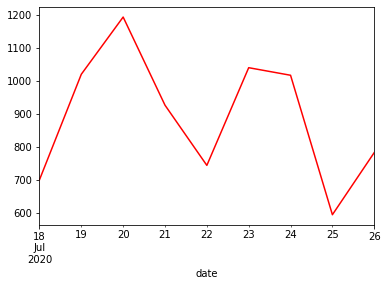

In [9]:
df_lukashenko.set_index('date').resample('D').text.count().plot(color='r')

In [11]:
fav_max = np.max(df_lukashenko['favorites'])
fav = df_lukashenko[df_lukashenko.favorites == fav_max].index[0]

# Max FAVs:
print("Tweet with most likes: \n{}".format(df_lukashenko['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("Username: {}".format(df_lukashenko['username'][fav]))
print ("Translation: {}".format(df_lukashenko['translated'][fav]))

Tweet with most likes: 
В Гомеле сейчас самый массовый митинг в поддержку бесстрашной белорусской женщины Светланы Тихановской, бросившей вызов жестокому и подлому диктатору Лукашенко. Море людей - море фонариков. Их свет освещает наш путь к свободе! Жыве Беларусь! 
Number of likes: 5737
Username: Lysistrata_by
Translation: The most massive rally in support of the fearless Belarusian woman Svetlana Tikhanovskaya, who challenged the cruel and vile dictator Lukashenko, is now in Gomel. A sea of people - a sea of lanterns. Their light illuminates our path to freedom! Long live Belarus!


In [12]:
def clean_text(text):
    '''Make text lowercase, remove reply, remove text in square brackets, remove links, remove user mention,
    remove punctuation, remove numbers and remove words containing numbers.'''
        
    text = text.lower()
    text = re.sub('^rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(re_url, '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('@\w+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

def get_consecutive_chars(text):
    ''' Count how many consecutive chars, consecutive upper chars and consecutive punctuation'''
    result = [(label, sum(1 for _ in group)) for label, group in groupby(text)]
    
    consecutive_chars = 0
    consecutive_chars_upper = 0
    consecutive_punctuations = 0
    
    for i in result:
        if i[1] > 1:
            if i[0] in string.punctuation:
                consecutive_punctuations += i[1]
            elif i[0].upper() == i[0]:
                consecutive_chars_upper += i[1]
            else:
                consecutive_chars += i[1]
                
    return {
        'qtd_consecutive_chars' : consecutive_chars,
        'qtd_consecutive_chars_upper': consecutive_chars_upper,
        'qtd_consecutive_punctuation' : consecutive_punctuations,
    }

<>:7: DeprecationWarning:

invalid escape sequence \[

<>:10: DeprecationWarning:

invalid escape sequence \w

<>:13: DeprecationWarning:

invalid escape sequence \w

<>:7: DeprecationWarning:

invalid escape sequence \[

<>:10: DeprecationWarning:

invalid escape sequence \w

<>:13: DeprecationWarning:

invalid escape sequence \w

<>:7: DeprecationWarning:

invalid escape sequence \[

<>:10: DeprecationWarning:

invalid escape sequence \w

<>:13: DeprecationWarning:

invalid escape sequence \w

<ipython-input-12-87a5ebf82f42>:7: DeprecationWarning:

invalid escape sequence \[

<ipython-input-12-87a5ebf82f42>:10: DeprecationWarning:

invalid escape sequence \w

<ipython-input-12-87a5ebf82f42>:13: DeprecationWarning:

invalid escape sequence \w



In [19]:
import re
import string
import sys
from itertools import groupby
from nltk.corpus import stopwords


import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

stop_words = stopwords.words('english')

re_url = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly

/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [20]:
# Apply cleaning function
df_lukashenko['text_cleaned'] = df_lukashenko['translated'].apply(lambda x: clean_text(x))

# Remove stop words
df_lukashenko['text_cleaned'] = df_lukashenko['text_cleaned'].str.split() \
    .apply(lambda x: [word for word in x if word not in stop_words]) \
    .apply(lambda x: ' '.join(x))

In [15]:
def vader_scorer(df):
    '''Compute vaderSentiment scores for each tweet
    Args: Dataframe containing a 'text' column
    Returns: Dataframe of vader scores
    '''
    analyzer = SentimentIntensityAnalyzer()
    vader_scores = df.loc[:,'text_cleaned'].map(analyzer.polarity_scores)

    dvec = DictVectorizer()
    vader_scores = dvec.fit_transform(vader_scores)
    
    vader_scores = pd.DataFrame(vader_scores.toarray(),columns=dvec.feature_names_)
    return vader_scores

In [16]:
vader_scores = vader_scorer(df_lukashenko)
df_lukashenko = pd.concat([df_lukashenko,vader_scores], axis=1)
df_lukashenko = df_lukashenko.drop_duplicates(subset='tweet_id', ignore_index=True)   

In [17]:
df_lukashenko.head()

,Unnamed: 0,username,tweet_id,date,favorites,hashtags,mentions,retweets,replies,text,...,topical_orgs,persons,orgs,propn,translated,text_cleaned,compound,neg,neu,pos
0,0,32iAu,1284277375954374656,2020-07-18 00:02:41+00:00,0,NaN,NaN,0,0,Just disqualify Lukashenko.,...,NaN,Lukashenko,NaN,Lukashenko,Just disqualify Lukashenko.,disqualify lukashenko,0.0000,0.000,1.000,0.000
1,1,Tamara50219545,1284277497778130945,2020-07-18 00:03:10+00:00,1,NaN,NaN,0,0,"КОРОНОВИРУС-это не только нужно убрать ненужных людей, но еще БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ, ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г.,ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного",...,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,КОРОНОВИРУС это не только нужно убрать ненужных людей но еще БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. БАНДУ из ЧЕЛОВЕК ЖИВЦА на Смерти ТУРЧЕНКО А.Г.,"CORONOVIRUS is not only the need to remove unnecessary people, but also the LOSS OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G., HIS BAND of 6 PERSONS on a ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent",coronovirus need remove unnecessary people also loss belarus usa terrorism life turchenko give debt belarus kgb belarus vv putin want take lukashenko ag band persons zhivtsa death ag turchenko innocent,-0.8910,0.324,0.585,0.090
2,2,SKRIPOLEGWOLF,1284277562764664832,2020-07-18 00:03:26+00:00,0,NaN,@YouTube,0,0,ПРОВАЛ ЗеКОМАНДЫ! ВОЙНА С ШАРИЕМ. ЛУКАШЕНКО НЕ ДОПУСТИТ ВМЕШАТЕЛЬСТВА ЗЕ... https://youtu.be/0pXpH0IsMIQ через @YouTube,...,NaN,NaN,@YouTube,ПРОВАЛ ЗеКОМАНДЫ ВОЙНА С ШАРИЕМ ЛУКАШЕНКО НЕ ДОПУСТИТ ВМЕШАТЕЛЬСТВА ЗЕ https://youtu.be/0pXpH0IsMIQ @YouTube,ZECOMAND&#39;S FAILURE! WAR WITH A BALL. LUKASHENKO WILL NOT ALLOW ZE INTERFERENCE ... https://youtu.be/0pXpH0IsMIQ via @YouTube,failure war ball lukashenko allow ze interference via,-0.7430,0.511,0.355,0.135
3,3,Tamara50219545,1284277856537894912,2020-07-18 00:04:36+00:00,0,NaN,NaN,0,0,"БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ, ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г. и ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного человека,ней играли как Жертве НКВД-МВД всю жизнь с Детства",...,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,БЕЗДЕНЕЖЬЕ БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. ЛУКАШЕНКО А.Г. ЕГО БАНДУ ЖИВЦА на Смерти ТУРЧЕНКО А.Г. ней как Жертве НКВД МВД с Детства,"THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSONS on the ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent person, she was played as a Victim of the NKVD-MVD all my life from Childhood",money belarus usa terrorism life turchenko give debt belarus kgb belarus vv putin want take lukashenko ag band persons zhivtsa death ag turchenko innocent person played victim nkvdmvd life childhood,-0.8402,0.310,0.545,0.145
4,4,Tamara50219545,1284277934350577666,2020-07-18 00:04:54+00:00,0,NaN,NaN,0,0,"БЕЗДЕНЕЖЬЕ БЕЛАРУСИ, USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ТУРЧЕНКО Т.О. НЕ ДАЕТ В ДОЛГ БЕЛАРУСИ,ПОЭТОМУ КГБ БЕЛАРУСИ С ПУТИНЫМ В.В. ХОТЯТ ВЗЯТЬ ЛУКАШЕНКО А.Г. и ЕГО БАНДУ из 6 ЧЕЛОВЕК на ЖИВЦА, на Смерти ТУРЧЕНКО А.Г., невиновного человека,ней играли как Жертве НКВД-МВД всю жизнь с Детства",...,NaN,NaN,Смерти ТУРЧЕНКО А.Г.,БЕЗДЕНЕЖЬЕ БЕЛАРУСИ USA ЗА ТЕРРОРИЗМ НА ЖИЗНИ ДАЕТ В ДОЛГ БЕЛАРУСИ ПОЭТОМУ КГБ С ПУТИНЫМ В.В. ЛУКАШЕНКО А.Г. ЕГО БАНДУ ЖИВЦА на Смерти ТУРЧЕНКО А.Г. ней как Жертве НКВД МВД с Детства,"THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSONS on the ZHIVTSA, on the Death of A.G. TURCHENKO

In [19]:
# Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(df_lukashenko)):
    
    # current 'compound' score:
    curr_compound = df_lukashenko.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
df_lukashenko['sentiment_class'] = sentimentclass_list

# Check out the new column
df_lukashenko.tail()['sentiment_class']

8018    4
8019    2
8020    5
8021    2
8022    3
Name: sentiment_class, dtype: int64

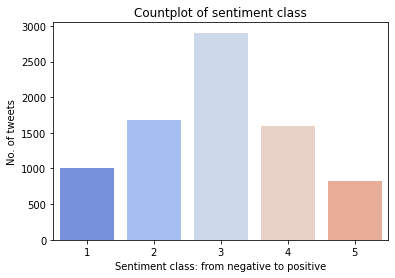

In [20]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (6,4))
sns.set_palette('coolwarm')
sns.countplot(df_lukashenko['sentiment_class'])
plt.title('Countplot of sentiment class')
plt.xlabel('Sentiment class: from negative to positive')
plt.ylabel('No. of tweets')
plt.show()

In [32]:
df_lukashenko.sort_values(by='compound', ascending=True)

,Unnamed: 0,username,tweet_id,date,favorites,hashtags,mentions,retweets,replies,text,...,persons,orgs,propn,translated,text_cleaned,compound,neg,neu,pos,sentiment_class
725,725,Andreybelarus68,1284705454212489216,2020-07-19 04:23:43+00:00,0,NaN,NaN,0,0,"Лукашенко уже не скрывает свою фашистскую сущность,ненависть,презрение к народу и ведёт войну с ним за свою пожизненную власть.Потому что,потеряв власть,фашист Лукашенко будет осуждён.А единственное наказание для фашиста Лукашенко за убийства,терроризм,казнокрадство - РАССТРЕЛ",...,NaN,казнокрадство - РАССТРЕЛ,Лукашенко уже не свою фашистскую к за свою пожизненную Потому потеряв фашист Лукашенко будет А единственное для фашиста Лукашенко за убийства казнокрадство РАССТРЕЛ,"Lukashenka no longer hides his fascist essence, hatred, contempt for the people and is waging a war with them for his lifelong power. Because, having lost power, the fascist Lukashenka will be convicted. And the only punishment for the fascist Lukashenka for murder, terrorism, embezzlement is SHOT",lukashenka longer hides fascist essence hatred contempt people waging war lifelong power lost power fascist lukashenka convicted punishment fascist lukashenka murder terrorism embezzlement shot,-0.9907,0.751,0.249,0.000,1
7835,7835,Tamara50219545,1287453803135074307,2020-07-26 18:24:41+00:00,0,NaN,NaN,1,0,"Банда Лукашенко А.Г.это ненормал.спец.наз. никто открыто не делает Убийство и Насилие при открытых Санкциях за терроризм и торговлю людьми,все наблюдают как после операций и врачей насильники включают прибор и Продолжают уничтожение вибрациями,зная,что их ждет Смерть за Терроризм",...,Смерть за Терроризм,NaN,Банда Лукашенко А.Г.это ненормал.спец.наз никто открыто не делает Убийство Насилие при Санкциях за терроризм и как после операций и врачей насильники включают прибор Продолжают Смерть Терроризм,"The gang of Lukashenko A.G. is an abnormal special forces. no one openly does Murder and Violence under the open Sanctions for terrorism and human trafficking, everyone watches as after operations and doctors the rapists turn on the device and Continue destruction with vibrations, knowing that Death for Terrorism awaits them",gang lukashenko ag abnormal special forces one openly murder violence open sanctions terrorism human trafficking everyone watches operations doctors rapists turn device continue destruction vibrations knowing death terrorism awaits,-0.9833,0.555,0.371,0.074,1
1867,1867,Rouslan5,1285085228793499648,2020-07-20 05:32:48+00:00,273,NaN,NaN,69,12,"Умрет Путин, умрет Россия! Умрет Лукашенко, умрет Беларусь! Умрет Хомейни, умрет Иран! Умрет Ким, умрет КНДР! Сколько еще счастливых моментов готовят Боги человечеству!",...,Боги,NaN,Путин Россия Лукашенко Беларусь Хомейни Иран Ким Сколько Боги человечеству,"Putin will die, Russia will die! Lukashenka will die, Belarus will die! Khomeini will die, Iran will die! Kim will die, the DPRK will die! How many more happy moments the Gods are preparing for humanity!",putin die russia die lukashenka die belarus die khomeini die iran die kim die dprk die many happy moments gods preparing humanity,-0.9826,0.651,0.271,0.077,1
7838,7838,Tamara50219545,1287454206295707648,2020-07-26 18:26:17+00:00,0,NaN,NaN,0,0,"Банда Лукашенко А.Г.это Ненормал.спец.наз.никто открыто не делает Убийство и Насилие при открытых Санкциях за терроризм и торговлю людьми,все наблюдают как после операций насильники включают прибор и Продолжают вибрации через оставшиеся чипы,зная,что их ждет Смерть за Терроризм",...,Смерть за Терроризм,NaN,Банда Лукашенко А.Г.это Ненормал.спец.наз.никто открыто не делает Убийство Насилие при Санкциях за терроризм и как после операций насильники включают прибор Продолжают оставшиеся чипы Смерть Терроризм,"The gang of Lukashenko A.G. is an Abnormal Special Forces. No one openly does Murder and Violence under the open Sanctions for terrorism and human trafficking, everyone watches how, after the operations, the rapists turn on the device and Continue to vibrate throug

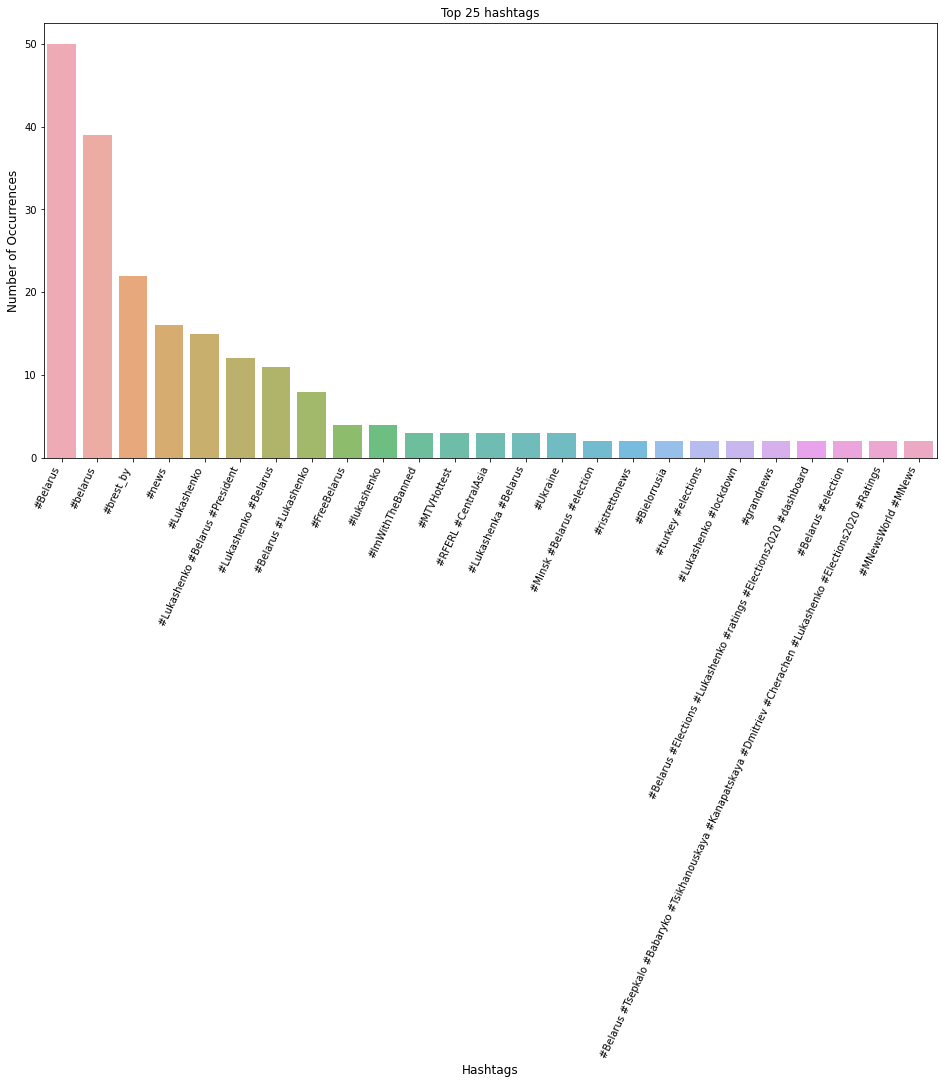

In [24]:
hashtags_count  = df_lukashenko['hashtags'].value_counts()
hashtags_count = hashtags_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(hashtags_count.index, hashtags_count.values, alpha=0.8)
plt.title('Top 25 hashtags')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hashtags', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

In [25]:
from __future__ import print_function

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
docs_raw = df_lukashenko.text_cleaned
print(len(docs_raw))

8023


In [28]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(docs_raw)
print(dtm_tf.shape)

(8023, 1384)


In [29]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)
print(dtm_tfidf.shape)

(8023, 1384)


/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.



In [30]:
# for TF DTM
lda_tf = LatentDirichletAllocation(random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [31]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.196663  0.061303       1        1  14.567979
3     -0.137070  0.111944       2        1  11.433328
7      0.144687  0.048541       3        1  10.729162
0     -0.078531  0.125793       4        1  10.502501
8     -0.198640  0.131422       5        1   9.956717
2     -0.109231 -0.267192       6        1   8.977074
6     -0.081211 -0.075958       7        1   8.876140
4      0.155007  0.051274       8        1   8.452448
1      0.068735 -0.125050       9        1   8.366623
9      0.039592 -0.062076      10        1   8.138030, topic_info=                 Term         Freq        Total Category  logprob  loglift
762              news   454.000000   454.000000  Default  30.0000  30.0000
97            belarus  2400.000000  2400.000000  Default  29.0000  29.0000
431           foreign   245.000000   245.000000  Default  28.0000  28.0000
706             media   279.000000   279.000000  Default  27.0000  27.0000
1351            women   258.000000   258.000000  Default  26.0000  26.0000
610             kolya   266.000000   266.000000  Default  25.0000  25.0000
1048          russian   259.000000   259.000000  Default  24.0000  24.0000
642              like   398.000000   398.000000  Default  23.0000  23.0000
377             expel   169.000000   169.000000  Default  22.0000  22.0000
835            people   744.000000   744.000000  Default  21.0000  21.0000
730             minsk   358.000000   358.000000  Default  20.0000  20.0000
675        lukashenka  3053.000000  3053.000000  Default  19.0000  19.0000
343         elections   563.000000   563.000000  Default  18.0000  18.0000
893         president   792.000000   792.000000  Default  17.0000  17.0000
529   hospitalization   145.000000   145.000000  Default  16.0000  16.0000
896             press   138.000000   138.000000  Default  15.0000  15.0000
589       journalists   141.000000   141.000000  Default  14.0000  14.0000
1274           united   171.000000   171.000000  Default  13.0000  13.0000
29          alexander   626.000000   626.000000  Default  12.0000  12.0000
342          election   216.000000   216.000000  Default  11.0000  11.0000
1161           states   131.000000   131.000000  Default  10.0000  10.0000
818         overthrow   115.000000   115.000000  Default   9.0000   9.0000
46          announced   129.000000   129.000000  Default   8.0000   8.0000
1073        secretary   109.000000   109.000000  Default   7.0000   7.0000
37         ambassador   110.000000   110.000000  Default   6.0000   6.0000
709           meeting   170.000000   170.000000  Default   5.0000   5.0000
742            moscow   171.000000   171.000000  Default   4.0000   4.0000
761               new   200.000000   200.000000  Default   3.0000   3.0000
478        government   110.000000   110.000000  Default   2.0000   2.0000
894      presidential   213.000000   213.000000  Default   1.0000   1.0000
...               ...          ...          ...      ...      ...      ...
812            orders     9.795079    11.105100  Topic10  -6.1428   2.3831
328              eaeu    22.038648    25.212153  Topic10  -5.3319   2.3741
1087         servants    11.267007    13.121228  Topic10  -6.0028   2.3563
26                air    15.301307    18.107923  Topic10  -5.6968   2.3402
955           rallies    19.146793    23.122032  Topic10  -5.4726   2.3200
747             named    22.804266    28.112933  Topic10  -5.2978   2.2993
1048          russian   165.887173   259.645568  Topic10  -3.3134   2.0606
709           meeting   107.937543   170.984301  Topic10  -3.7431   2.0486
415             fight    56.057343    85.707087  Topic10  -4.3983   2.0841
492              half    31.871289    44.567156  Topic10  -4.9630   2.1733
211         confidant    20.026895    25.141519  Topic10  -5.4276   2.2812
835            people   216.508968   744.783883  Topic10  -3.0471   1.2732
1355     

In [33]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.137820 -0.119019       1        1  11.544011
1     -0.054761 -0.066284       2        1  10.881904
9     -0.036932  0.002257       3        1  10.855007
8      0.129627  0.162363       4        1  10.807598
7     -0.097277 -0.070109       5        1  10.010883
4     -0.019138  0.008240       6        1   9.896987
0     -0.056680  0.049517       7        1   9.414611
3      0.005761  0.166263       8        1   9.273188
6      0.001755  0.039599       9        1   9.198768
2      0.265464 -0.172827      10        1   8.117042, topic_info=                 Term        Freq       Total Category  logprob  loglift
610             kolya  108.000000  108.000000  Default  30.0000  30.0000
431           foreign   66.000000   66.000000  Default  29.0000  29.0000
529   hospitalization   53.000000   53.000000  Default  28.0000  28.0000
1351            women   84.000000   84.000000  Default  27.0000  27.0000
377             expel   53.000000   53.000000  Default  26.0000  26.0000
896             press   46.000000   46.000000  Default  25.0000  25.0000
1273            unite   41.000000   41.000000  Default  24.0000  24.0000
1073        secretary   38.000000   38.000000  Default  23.0000  23.0000
1279           unseat   41.000000   41.000000  Default  22.0000  22.0000
68            attempt   39.000000   39.000000  Default  21.0000  21.0000
706             media   76.000000   76.000000  Default  20.0000  20.0000
762              news  113.000000  113.000000  Default  19.0000  19.0000
700          maverick   36.000000   36.000000  Default  18.0000  18.0000
818         overthrow   38.000000   38.000000  Default  17.0000  17.0000
589       journalists   44.000000   44.000000  Default  16.0000  16.0000
1044           rumors   35.000000   35.000000  Default  15.0000  15.0000
278            denied   31.000000   31.000000  Default  14.0000  14.0000
37         ambassador   35.000000   35.000000  Default  13.0000  13.0000
668              lost   39.000000   39.000000  Default  12.0000  12.0000
1161           states   37.000000   37.000000  Default  11.0000  11.0000
530      hospitalized   36.000000   36.000000  Default  10.0000  10.0000
1274           united   55.000000   55.000000  Default   9.0000   9.0000
675        lukashenka  528.000000  528.000000  Default   8.0000   8.0000
967              read   36.000000   36.000000  Default   7.0000   7.0000
443            fucked   28.000000   28.000000  Default   6.0000   6.0000
802         opponents   37.000000   37.000000  Default   5.0000   5.0000
783           offered   25.000000   25.000000  Default   4.0000   4.0000
595               kgb   29.000000   29.000000  Default   3.0000   3.0000
248            crisis   25.000000   25.000000  Default   2.0000   2.0000
1128              son   37.000000   37.000000  Default   1.0000   1.0000
...               ...         ...         ...      ...      ...      ...
1242         trillion    9.246132   10.082236  Topic10  -5.1067   2.4246
229             count    9.124256    9.960467  Topic10  -5.1200   2.4235
1323         waitquot    9.111717    9.947826  Topic10  -5.1214   2.4234
1041         rudeness    8.838868    9.674979  Topic10  -5.1518   2.4208
250           crosses    8.433394    9.269498  Topic10  -5.1987   2.4167
1085           sergei    7.859488    8.695631  Topic10  -5.2692   2.4101
53             appeal   13.197614   14.610768  Topic10  -4.7509   2.4095
836        peoplequot    7.441867    8.278017  Topic10  -5.3238   2.4047
198          comments    7.331837    8.167983  Topic10  -5.3387   2.4032
406             fears    6.920961    7.757131  Topic10  -5.3964   2.3971
395    falsifications    6.348434    7.184553  Topic10  -5.4827   2.3875
119           borders    6.338729    7.174921  Topic10  -5.4843   2.3873
420           fingers    6.325459    7.194427  Topic10  -5.4864   2.3825
403             favor   

In [34]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.295770  0.071220       1        1  14.567979
3      0.136275  0.089511       2        1  11.433328
7     -0.193909  0.195201       3        1  10.729162
0      0.134744 -0.109334       4        1  10.502501
8      0.335937 -0.125283       5        1   9.956717
2      0.268617  0.262860       6        1   8.977074
6      0.002493  0.286392       7        1   8.876140
4      0.027483 -0.295114       8        1   8.452448
1     -0.232338 -0.095346       9        1   8.366623
9     -0.183533 -0.280107      10        1   8.138030, topic_info=                 Term         Freq        Total Category  logprob  loglift
762              news   454.000000   454.000000  Default  30.0000  30.0000
97            belarus  2400.000000  2400.000000  Default  29.0000  29.0000
431           foreign   245.000000   245.000000  Default  28.0000  28.0000
706             media   279.000000   279.000000  Default  27.0000  27.0000
1351            women   258.000000   258.000000  Default  26.0000  26.0000
610             kolya   266.000000   266.000000  Default  25.0000  25.0000
1048          russian   259.000000   259.000000  Default  24.0000  24.0000
642              like   398.000000   398.000000  Default  23.0000  23.0000
377             expel   169.000000   169.000000  Default  22.0000  22.0000
835            people   744.000000   744.000000  Default  21.0000  21.0000
730             minsk   358.000000   358.000000  Default  20.0000  20.0000
675        lukashenka  3053.000000  3053.000000  Default  19.0000  19.0000
343         elections   563.000000   563.000000  Default  18.0000  18.0000
893         president   792.000000   792.000000  Default  17.0000  17.0000
529   hospitalization   145.000000   145.000000  Default  16.0000  16.0000
896             press   138.000000   138.000000  Default  15.0000  15.0000
589       journalists   141.000000   141.000000  Default  14.0000  14.0000
1274           united   171.000000   171.000000  Default  13.0000  13.0000
29          alexander   626.000000   626.000000  Default  12.0000  12.0000
342          election   216.000000   216.000000  Default  11.0000  11.0000
1161           states   131.000000   131.000000  Default  10.0000  10.0000
818         overthrow   115.000000   115.000000  Default   9.0000   9.0000
46          announced   129.000000   129.000000  Default   8.0000   8.0000
1073        secretary   109.000000   109.000000  Default   7.0000   7.0000
37         ambassador   110.000000   110.000000  Default   6.0000   6.0000
709           meeting   170.000000   170.000000  Default   5.0000   5.0000
742            moscow   171.000000   171.000000  Default   4.0000   4.0000
761               new   200.000000   200.000000  Default   3.0000   3.0000
478        government   110.000000   110.000000  Default   2.0000   2.0000
894      presidential   213.000000   213.000000  Default   1.0000   1.0000
...               ...          ...          ...      ...      ...      ...
812            orders     9.795079    11.105100  Topic10  -6.1428   2.3831
328              eaeu    22.038648    25.212153  Topic10  -5.3319   2.3741
1087         servants    11.267007    13.121228  Topic10  -6.0028   2.3563
26                air    15.301307    18.107923  Topic10  -5.6968   2.3402
955           rallies    19.146793    23.122032  Topic10  -5.4726   2.3200
747             named    22.804266    28.112933  Topic10  -5.2978   2.2993
1048          russian   165.887173   259.645568  Topic10  -3.3134   2.0606
709           meeting   107.937543   170.984301  Topic10  -3.7431   2.0486
415             fight    56.057343    85.707087  Topic10  -4.3983   2.0841
492              half    31.871289    44.567156  Topic10  -4.9630   2.1733
211         confidant    20.026895    25.141519  Topic10  -5.4276   2.2812
835            people   216.508968   744.783883  Topic10  -3.0471   1.2732
1355     

In [14]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'textcat'])

/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/spacy/util.py:271: UserWarning:

[W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



In [15]:
# setting the random seed for reproducibility
import random
random.seed(493)
# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

/opt/anaconda3/envs/daria_allwomen/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [16]:
from joblib import Parallel, delayed

def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return [item for sublist in list_of_lists for item in sublist]

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append([(ent.text) for ent in doc.ents if ent.label_ in ['NORP', 'PERSON', 'FAC', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'EVENT']])
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(df_lukashenko), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [21]:
df_lukashenko['entities'] = preprocess_parallel(df_lukashenko['text_cleaned'], chunksize=1000)

In [22]:
entities = [entity for entity in df_lukashenko.entities if entity != []]
entities = [item for sublist in entities for item in sublist]
entities_set = set(entities)

In [23]:
df_counts = pd.Series(entities).value_counts()[:50].to_frame().reset_index()
df_counts.columns=['entity', 'count']
df_counts

,entity,count
0,lukashenko,612
1,belarusian,492
2,russia,386
3,belarus,366
4,alexander lukashenko,302
5,russian,240
6,belarusians,200
7,putin,144
8,moscow,144
9,belarus alexander lukashenko,126


In [44]:
# Load model to return language object
nlp = spacy.load('en_core_web_sm')
# Calling nlp on our tweet texts to return a processed Doc for each
df_lukashenko['doc'] = [nlp(text) for text in df_lukashenko.translated]
df_lukashenko.sample(3)

,Unnamed: 0,username,tweet_id,date,favorites,hashtags,mentions,retweets,replies,text,...,propn,translated,text_cleaned,compound,neg,neu,pos,sentiment_class,entities,doc
2676,2676,kavaleuski,1285254112226025474,2020-07-20 16:43:53+00:00,0,NaN,NaN,0,0,"После 12 лет перерыва Лукашенко назначил посла Беларуси в США, замминистра иностранных дел Олега Кравченко.",...,Лукашенко Беларуси в США замминистра дел Олега Кравченко,"After a 12-year hiatus, Lukashenko has appointed Belarus&#39; Ambassador to the United States, Deputy Foreign Minister Oleg Kravchenko.",hiatus lukashenko appointed ambassador united states deputy foreign minister oleg kravchenko,0.4215,0.0,0.781,0.219,4,"[hiatus lukashenko, united states, oleg kravchenko]","(After, a, 12-year, hiatus, ,, Lukashenko, has, appointed, Belarus&#39, ;, Ambassador, to, the, United, States, ,, Deputy, Foreign, Minister, Oleg, Kravchenko, .)"
2645,2645,GlavTW,1285244249907302400,2020-07-20 16:04:42+00:00,0,NaN,NaN,0,0,Лукашенко отдал США новые рычаги влияния на Россию Президент Белоруссии Александр Лукашенко назначил нового посла республики в США — впервые за 12 лет.,...,США новые рычаги влияния на Россию Президент Белоруссии Александр Лукашенко назначил в США впервые за,Lukashenko gave the US new levers of influence on Russia President of Belarus Alexander Lukashenko has appointed a new ambassador of the republic to the United States - for the first time in 12 years.,lukashenko gave us new levers influence russia president belarus alexander lukashenko appointed new ambassador republic united states first time years,0.4215,0.0,0.872,0.128,4,"[lukashenko, levers, russia, belarus alexander lukashenko, republic united states]","(Lukashenko, gave, the, US, new, levers, of, influence, on, Russia, President, of, Belarus, Alexander, Lukashenko, has, appointed, a, new, ambassador, of, the, republic, to, the, United, States, -, for, the, first, time, in, 12, years, .)"
2571,2571,JonDKatz,1285226110486228992,2020-07-20 14:52:37+00:00,1,#US #EU,@StateDept @eu_eeas,0,0,Changes happening in Belarus w/largest opppostion rally. #US &amp; #EU need to be synched in response to the potential for further Lukashenka crackdown. @StateDept @eu_eeas need Unified Belarusian Opposition Massive Election Rally Against Strongman Lukashenka,...,Belarus w US amp EU Lukashenka Unified Belarusian Opposition Massive Election Rally Strongman Lukashenka,Changes happening in Belarus w/largest opppostion rally. #US &amp; #EU need to be synched in response to the potential for further Lukashenka crackdown. @StateDept @eu_eeas need Unified Belarusian Opposition Massive Election Rally Against Strongman Lukashenka,changes happening belarus wlargest opppostion rally us amp eu need synched response potential lukashenka crackdown need unified belarusian opposition massive election rally strongman lukashenka,0.5106,0.0,0.837,0.163,4,"[belarus wlargest opppostion, eu, belarusian]","(Changes, happening, in, Belarus, w, /, largest, opppostion, rally, ., #, US, &, amp, ;, #, EU, need, to, be, synched, in, response, to, the, potential, for, further, Lukashenka, crackdown, ., @StateDept, @eu_eeas, need, Unified, Belarusian, Opposition, Massive, Election, Rally, Against, Strongman, Lukashenka)"


In [48]:
df_lukashenko.translated.to_csv('lukashenko_translated.txt', header=None, index=None, sep=' ', mode='a')

In [52]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [53]:
# Extract the plain text content of the page
text = open("lukashenko_translated.txt", 'r', encoding='utf-8').read()
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
print(text)

"Just disqualify Lukashenko. ""CORONOVIRUS is not only the need to remove unnecessary people, but also the LOSS OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G., HIS BAND of 6 PERSONS on a ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent""ZECOMAND&#39;S FAILURE! WAR WITH A BALL. LUKASHENKO WILL NOT ALLOW ZE INTERFERENCE ... https://youtu.be/0pXpH0IsMIQ via @YouTube""THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSONS on the ZHIVTSA, on the Death of A.G. TURCHENKO, an innocent person, she was played as a Victim of the NKVD-MVD all my life from Childhood""THE MONEY OF BELARUS, USA FOR TERRORISM IN LIFE TURCHENKO T.O. DOES NOT GIVE IN A DEBT TO BELARUS, SO THE KGB OF BELARUS WITH V.V. PUTIN WANT TO TAKE LUKASHENKO A.G. and HIS BAND of 6 PERSO

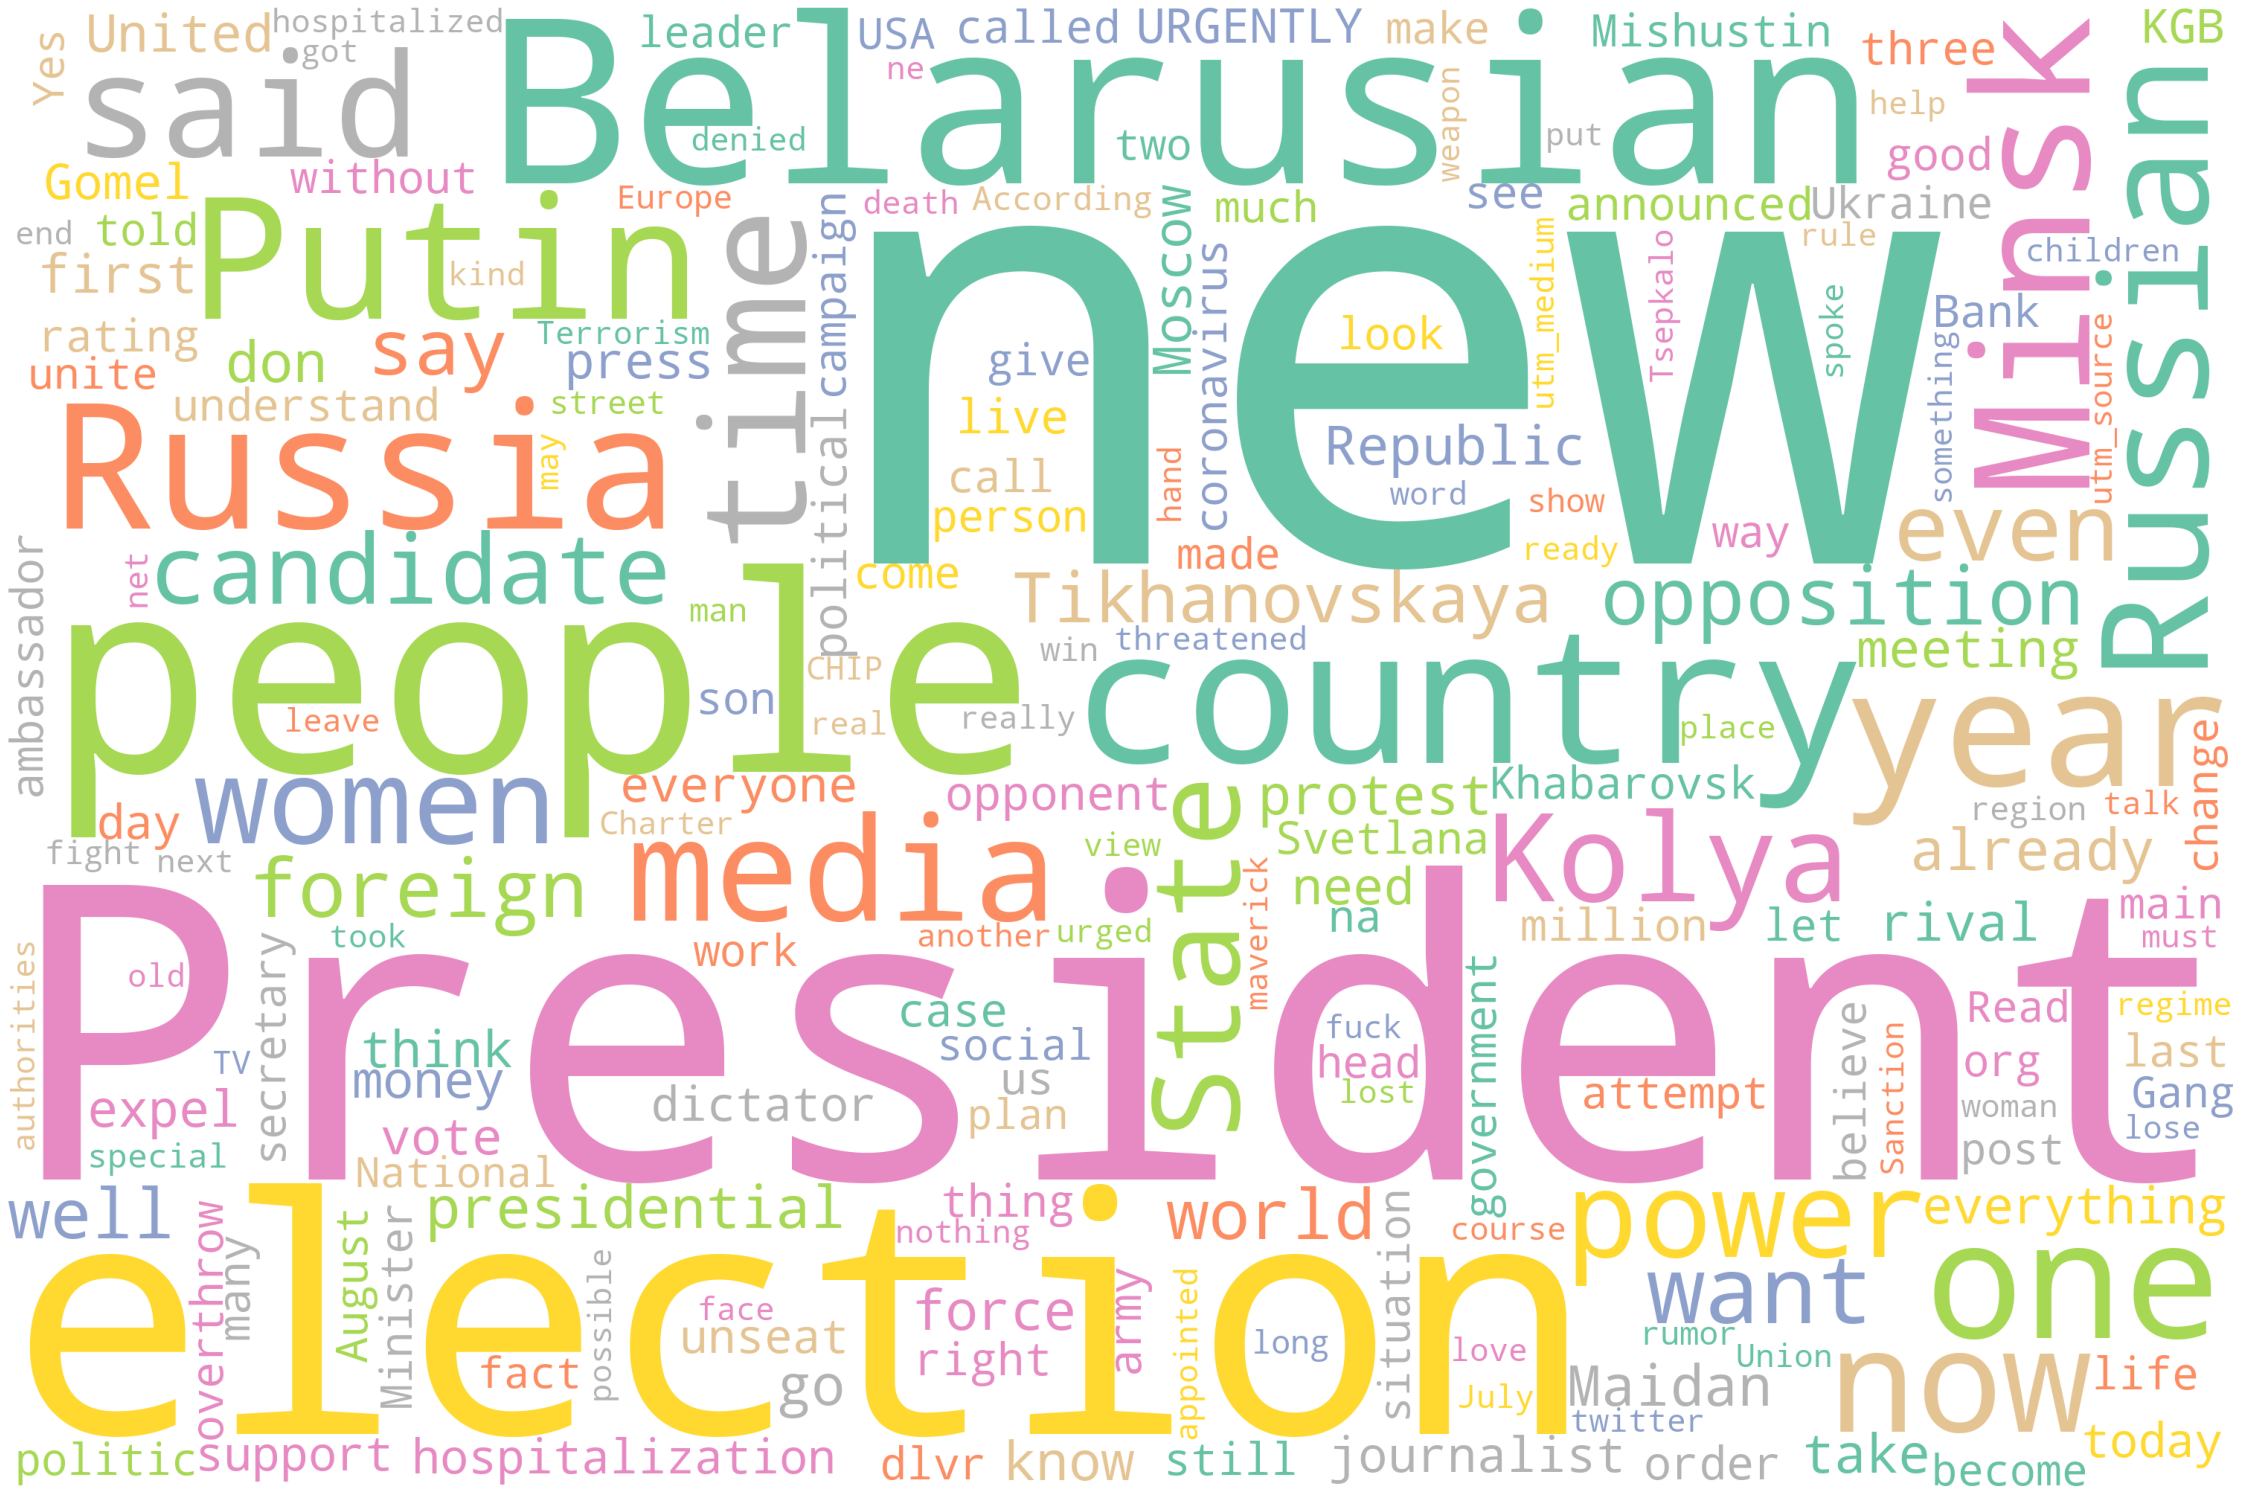

In [66]:
# Import package
from wordcloud import WordCloud, STOPWORDS
stop_words = ["https","html","youtu", "via", "d0","d1", "will", "quot","amp","alexander","ru", "lukashenka", "lukashenko", "belarus", "youtube", "video"] + list(STOPWORDS)
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stop_words).generate(text)
# Plot
plot_cloud(wordcloud)